In [13]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series

fec=pd.read_csv('./python-project/pydata/ch09/P00000001-ALL.csv',low_memory=False)
unique_cands=fec.cand_nm.unique()
parties={'Bachmann, Michelle':'Republican',
        'Romney, Mitt':'Republican','Obama, Barack':'Democrat',"Roemer, Charles E. 'Buddy' III":'Republican',
         'Pawlenty, Timothy':'Republican','Johnson, Gary Earl':'Republican', 'Paul, Ron':'Republican', 
         'Santorum, Rick':'Republican','Cain, Herman':'Republican', 'Gingrich, Newt':'Republican',
         'McCotter, Thaddeus G':'Republican','Huntsman, Jon':'Republican', 'Perry, Rick':'Republican'}

In [41]:
fec['party']=fec.cand_nm.map(parties)
fec['party'].value_counts()
fec=fec[fec.contb_receipt_amt>0]
fec_mrbo=fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]
fec.contbr_occupation.value_counts()[:10]
occ_mapping={'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
            'INFORMATION REQUESTED':'NOT PROVIDED',
            'INFORMATION REQUESTED(BEST EFFORTS)':'NOT PROVIDED',
            'C.E.O.':'CEO'}
f=lambda x:occ_mapping.get(x,x)
fec.contbr_occupation=fec.contbr_occupation.map(f)
emp_mapping={
    'INFORMATION REQUESTED PER BEST EFFORT':'NOT PROVIDED',
    'INFORMATION REQUESTED':'NOT PROVIDED',
    'SELF':'SELF-EMPLOYED',
    'SELF EMPLYED':'SELF-EMPLOYED',
}
f=lambda x:emp_mapping.get(x,x)
fec.contbr_employer=fec.contbr_employer.map(f)
by_occupation=fec.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc='sum')
over2mm=by_occupation[by_occupation.sum(1)>2000000]
#over2mm.plot(kind='barh')
fec_mrbo

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,091280020,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,091280005,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,090120092,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
416,C00431171,P80003353,"Romney, Mitt","WILSON, ANDREW C. MR.",DPO,AE,098700023,US DEPT OF STATE,FOREIGN SERVICE OFFICER,50.0,17-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
417,C00431171,P80003353,"Romney, Mitt","GRIFFIS, JOHN",APO,AE,091280011,US ARMY,MILITARY OFFICER,250.0,20-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
418,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,090120092,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,09-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
419,C00431171,P80003353,"Romney, Mitt","GRIFFIS, JOHN",APO,AE,091280011,US ARMY,MILITARY OFFICER,250.0,28-JAN-12,NaN,NaN,NaN,SA17A,771933,Republican
420,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE MR.",APO,AE,091280005,US ARMY,ENGINEER,50.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican


In [45]:
def get_top_amounts(group,key,n=5):
    totals=group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending=False)[:n]

grouped=fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts,'contbr_occupation',n=7)

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305116.38
               ATTORNEY             11141982.97
               NOT PROVIDED          4866973.96
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
               LAWYER                3160478.87
               CONSULTANT            2459912.71
Romney, Mitt   RETIRED              11508473.59
               NOT PROVIDED         11396894.84
               HOMEMAKER             8147446.22
               ATTORNEY              5364718.82
               PRESIDENT             2491244.89
               CEO                   2343547.03
               EXECUTIVE             2300947.03
Name: contb_receipt_amt, dtype: float64

In [46]:
grouped.apply(get_top_amounts,'contbr_employer',n=7)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             18157517.16
               NOT EMPLOYED                               8586308.70
               NOT PROVIDED                               5053480.37
               HOMEMAKER                                  2605408.54
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                              7413260.98
               STUDENT                                     496490.94
               CREDIT SUISSE                               281150.00
               MORGAN STANLEY                    

In [52]:
bins=np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels=pd.cut(fec_mrbo.contb_receipt_amt,bins)
grouped=fec_mrbo.groupby(['cand_nm',labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


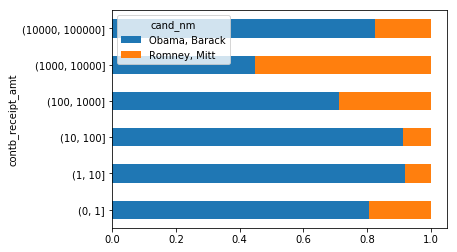

In [59]:
bucket_sums=grouped.contb_receipt_amt.sum().unstack(0)
normed_sums=bucket_sums.div(bucket_sums.sum(axis=1),axis=0)
normed_sums[:-2].plot(kind='barh',stacked=True)

In [62]:
grouped=fec_mrbo.groupby(['cand_nm','contbr_st'])
totals=grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals=totals[totals.sum(1)>100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [69]:
test=np.array([[[1,2,3,4],[1,2,3,4],[1,2,3,4]],[[2,3,4,5],[2,3,4,5],[2,3,4,5]]])
print(test)
print('---------')
print(test.sum())
print('------000')
print(test.sum(0))
print('------111')
print(test.sum(1))
print('------222')
print(test.sum(2))

[[[1 2 3 4]
  [1 2 3 4]
  [1 2 3 4]]

 [[2 3 4 5]
  [2 3 4 5]
  [2 3 4 5]]]
---------
72
------000
[[3 5 7 9]
 [3 5 7 9]
 [3 5 7 9]]
------111
[[ 3  6  9 12]
 [ 6  9 12 15]]
------222
[[10 10 10]
 [14 14 14]]
